In [0]:
# ! pip install --upgrade -q gspread
# ! pip install plotnine
# ! pip install -U statsmodels
import numpy as np 
import pandas as pd
import pickle
import re

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
datapath = './drive/My Drive/Homework/HotelPricePrediction/'

path_hotel_data = datapath + 'hotel_data.xlsx'
path_hotel_room_data = datapath + 'hotel_room_data.xlsx'
# path_hotel_day6_1 = './drive/My Drive/HotelPricePrediction/data/hotel_price_2019-04-06 (1).pkl'
# path_hotel_day6_2 = './drive/My Drive/HotelPricePrediction/data/hotel_price_2019-04-06_2.pkl'
# path_hotel_day6_3 = './drive/My Drive/HotelPricePrediction/data/hotel_price_2019-04-06_3.pkl'

path_hotel_day7_1 = './drive/My Drive/Homework/HotelPricePrediction/data/hotel_price_2019-04-07.pkl'
path_hotel_day7_2 = './drive/My Drive/Homework/HotelPricePrediction/data/hotel_price_2019-04-07_2.pkl'
path_hotel_day7_3 = './drive/My Drive/Homework/HotelPricePrediction/data/hotel_price_2019-04-07_3.pkl'
path_hotel_every_day = datapath + 'preprocess data/hotel_predict_data (1).csv'

# day6_1_price_dict = pickle.load(open(path_hotel_day6_1,'rb'))
# day6_2_price_dict = pickle.load(open(path_hotel_day6_2,'rb'))
# day6_3_price_dict = pickle.load(open(path_hotel_day6_3,'rb'))
# day_list = [day6_1_price_dict,day6_2_price_dict,day6_3_price_dict]
day6_1_price_dict = pickle.load(open(path_hotel_day7_1,'rb'))
day6_2_price_dict = pickle.load(open(path_hotel_day7_2,'rb'))
day6_3_price_dict = pickle.load(open(path_hotel_day7_3,'rb'))
day_list = [day6_1_price_dict,day6_2_price_dict,day6_3_price_dict]


for i in day_list :
  i.pop('Time_collect')
hotel_price_day6_1 = pd.DataFrame(day6_1_price_dict)
hotel_price_day6_2 = pd.DataFrame(day6_2_price_dict)
hotel_price_day6_3 = pd.DataFrame(day6_3_price_dict)

hotel_data = pd.read_excel(path_hotel_data)
hotel_room_data = pd.read_excel(path_hotel_room_data)
hotel_price = pd.concat([hotel_price_day6_1,hotel_price_day6_2,hotel_price_day6_3],ignore_index=True)

all_hotel_data = pd.read_csv(path_hotel_every_day)

In [0]:
all_hotel_data.shape, all_hotel_data.columns

((2583, 162),
 Index(['Unnamed: 0', 'hotel_name', 'hotel_location', 'hotel_star',
        'hotel_location_rating', 'hotel_nearby_place_distance',
        'hotel_popular_place_distance', 'hotel_user_Ratings',
        'hotel_user_Ratings_text', 'hotel_room_Type_Names',
        ...
        'district_ Siam', 'district_ Silom', 'district_ South Thonburi',
        'district_ Srikan', 'district_ Sukhumvit',
        'district_ Suvarnabhumi Airport', 'district_ Thonburi',
        'district_ Thungmahamek', 'district_Phranakorn', 'Hotel_prices'],
       dtype='object', length=162))

In [0]:
hotel_room_data = hotel_room_data.dropna(subset = ['hotel_room_Benefits'] )
hotel_room_data = hotel_room_data.reset_index(drop=True)

In [0]:
for i in range(hotel_room_data.shape[0]) :
  hotel_room_data.loc[i, 'number_of_benefits'] = len(hotel_room_data.loc[i,'hotel_room_Benefits'].split(';'))

In [0]:
hotel_room_data

,hotel_id_in_our_database,hotel_user_Ratings,hotel_user_Ratings_text,hotel_room_Type_Names,hotel_room_Benefits,feature_data,Features,adult_capacity,children_capacity,Room Capacity,...,Clothes rack,Locker,Carbon monoxide detector,Pets allowed in room,Smoke detector,In-room safe box,Laptop safe box,Fire extinguisher,First aid kit,number_of_benefits
0,0,8.1,Excellent,Deluxe Double Room,Free Wi-Fi ;Extra low price! (non-refundable) ;,{'Features': '1 king bed&&Room size: 28 m²/301...,1 king bed&&Room size: 28 m²/301 ft²&&City vie...,2.0,2.0,28.0,...,1,0,0,0,0,0,0,0,0,3.0
1,0,8.1,Excellent,Deluxe Double Room,Book without credit card ;Free Wi-Fi ;Cancella...,{'Features': '1 king bed&&Room size: 28 m²/301...,1 king bed&&Room size: 28 m²/301 ft²&&City vie...,2.0,2.0,28.0,...,1,0,0,0,0,0,0,0,0,4.0
2,0,8.1,Excellent,Deluxe Double Room,Free breakfast for 2 ;Free Wi-Fi ;Extra low pr...,{'Features': '1 king bed&&Room size: 28 m²/301...,1 king bed&&Room size: 28 m²/301 ft²&&City vie...,2.0,2.0,28.0,...,1,0,0,0,0,0,0,0,0,4.0
3,0,8.1,Excellent,Deluxe Twin Room,Free Wi-Fi ;Extra low price! (non-refundable) ;,{'Features': '2 single beds&&Room size: 28 m²/...,2 single beds&&Room size: 28 m²/301 ft²&&City ...,2.0,2.0,28.0,...,1,0,0,0,0,0,0,0,0,3.0
4,0,8.1,Excellent,Deluxe Twin Room,Book without credit card ;Free Wi-Fi ;Cancella...,{'Features': '2 single beds&&Room size: 28 m²/...,2 single beds&&Room size: 28 m²/301 ft²&&City ...,2.0,2.0,28.0,...,1,0,0,0,0,0,0,0,0,4.0
5,0,8.1,Excellent,Deluxe Twin Room,Free breakfast for 2 ;Free Wi-Fi ;Extra low pr...,{'Features': '2 single beds&&Room size: 28 m²/...,2 single beds&&Room size: 28 m²/301 ft²&&City ...,2.0,2.0,28.0,...,1,0,0,0,0,0,0,0,0,4.0
6,0,8.1,Excellent,Premium Room,Free Wi-Fi ;Extra low price! (non-refundable) ;,{'Features': '1 king bed&&Room size: 32 m²/344...,1 king bed&&Room size: 32 m²/344 ft²&&City vie...,2.0,2.0,32.0,...,1,0,0,0,0,0,0,0,0,3.0
7,0,8.1,Excellent,Premium Room,Free breakfast for 2 ;Free Wi-Fi ;Extra low pr...,{'Features': '1 king bed&&Room size: 32 m²/344...,1 king bed&&Room size: 32 m²/344 ft²&&City vie...,2.0,2.0,32.0,...,1,0,0,0,0,0,0,0,0,4.0
8,0,8.1,Excellent,Premium Room,Free breakfast for 2 ;Book without credit card...,{'Features': '1 king bed&&Room size: 32 m²/344...,1 king bed&&Room size: 32 m²/344 ft²&&City vie...,2.0,2.0,32.0,...,1,0,0,0,0,0,0,0,0,5.0
9,0,8.1,Excellent,Suite Room,Free Wi-Fi ;Extra low price! (non-refundable) ;,{'Features': '1 king bed&&Room size: 36 m²/388...,1 king bed&&Room size: 36 m²/388 ft²&&City vie...,2.0,2.0,36.0,...,1,0,0,0,0,0,0,0,0,3.0


In [0]:
hotel_price = hotel_price.dropna(subset = ['Hotel_benefits'] )
hotel_price = hotel_price.reset_index(drop=True)

In [0]:
for i in range(hotel_price.shape[0]) :
  hotel_price.loc[i, 'number_of_benefits'] = len(hotel_price.loc[i, 'Hotel_benefits'].split(';'))

# Merge hotel data with room data

In [0]:
del hotel_price['Hotel_prices_standard']
#hotel_price.columns = ['hotel_name','hotel_room_Type_Names','Hotel_prices','hotel_room_Benefits','Time_collect']
merged_data = pd.merge(hotel_data,hotel_room_data,how='inner',on='hotel_id_in_our_database')
count_null = merged_data.isna().sum()
count_null[count_null != 0]

hotel_name          48
hotel_location      48
hotel_star          48
Features            31
Room Capacity     2107
view              5968
dtype: int64

In [0]:
merged_data = merged_data.dropna(subset=['Room Capacity','hotel_star'])
merged_data.loc[:,['view']] = merged_data.loc[:,['view']].fillna('unknown')
count_null = merged_data.isna().sum()
count_null[count_null != 0]

Series([], dtype: int64)

In [0]:
len(list(merged_data.columns))

109

In [0]:
merged_data.rename(columns={'hotel_room_Type_Names': 'room_type', 
                            'hotel_room_Benefits': 'room_benefits'
                           }, 
                   inplace=True)

In [0]:
hotel_price.rename(columns={'Hotel_name': 'hotel_name', 
                            'Hotel_roomtype': 'room_type', 
                            'Hotel_prices': 'room_price', 
                            'Hotel_benefits': 'room_benefits', 
                            'Time_collect': 'time_collected'
                           }, 
                   inplace=True)

In [0]:
print(merged_data.columns)
print()
print(hotel_price.columns)

Index(['hotel_id_in_our_database', 'hotel_name', 'hotel_location',
       'hotel_star', 'hotel_location_rating', 'hotel_nearby_place_distance',
       'hotel_popular_place_distance', 'hotel_user_Ratings',
       'hotel_user_Ratings_text', 'room_type',
       ...
       'Clothes rack', 'Locker', 'Carbon monoxide detector',
       'Pets allowed in room', 'Smoke detector', 'In-room safe box',
       'Laptop safe box', 'Fire extinguisher', 'First aid kit',
       'number_of_benefits'],
      dtype='object', length=109)

Index(['room_benefits', 'hotel_name', 'room_price', 'room_type',
       'number_of_benefits'],
      dtype='object')


# Merge hotel data with price data

In [0]:
merged_data_n = pd.merge(merged_data,hotel_price, how='inner', 
                         on=['hotel_name', 'room_type', 'number_of_benefits']) # join the data

In [0]:
len(hotel_price), len(merged_data), len(merged_data_n)

(4179, 12595, 3397)

In [0]:
merged_data_n.shape

(3397, 111)

# Get all distinct room benefits

In [0]:
all_benefits_x = set()

for i in range(merged_data_n.shape[0]):
  benefits_i = merged_data_n.loc[i, 'room_benefits_x'].split(';')
  for b_i in benefits_i:
    benefits_ii = b_i.split(',')
    for b_ii in benefits_ii:
      all_benefits_x.add(b_ii.strip(' '))

In [0]:
all_benefits_y = set()

for i in range(merged_data_n.shape[0]):
  benefits_i = merged_data_n.loc[i, 'room_benefits_y'].split(';')
  for b_i in benefits_i:
    benefits_ii = b_i.split(',')
    for b_ii in benefits_ii:
      all_benefits_y.add(b_ii.strip(' '))

In [0]:
duplicated_benefits = ['Free Breakfast', 'Free breakfast', 'Free cancellation before', 'Pay nothing until']

dup_benefits = set()

for b_x in all_benefits_x:
  for dup_b in duplicated_benefits:
    if(re.search(dup_b, b_x)!=None):
      dup_benefits.add(b_x)
      
for b_y in all_benefits_y:
  for dup_b in duplicated_benefits:
    if(re.search(dup_b, b_y)!=None):
      dup_benefits.add(b_y)

In [0]:
all_benefits = all_benefits_x.union(all_benefits_y) - dup_benefits

distinct_benefits = {'Free Breakfast', 'Free cancellation before', 'Pay nothing until'}
all_benefits = list(all_benefits.union(distinct_benefits) - {'', '2019'})

In [0]:
all_benefits

['Free shuttle service',
 'Complimentary snacks',
 'Parking',
 'Unlimited alcoholic beverages at lounge',
 'FREE cancellation',
 'Afternoon tea',
 'Fruit basket',
 'Airport drop-off',
 'Late check-In',
 'Full Body Massage',
 'Free mini bar',
 'Free cancellation before',
 'Meeting Room',
 'Free Breakfast',
 'Food discount',
 'Extra low price! (non-refundable)',
 'Pay nothing until',
 'Free Pool Access',
 'Local breakfast',
 'Book without credit card',
 'Early check-in',
 'Club lounge access',
 'Cancellation policy',
 'Limited laundry service',
 'Free extra bed',
 'Airport transfer [both ways]',
 'Free Fitness Center Access',
 'Selected beverages [non-alcoholic]',
 'Pay at the hotel',
 'Free sauna access',
 'Complimentary in-room fruit',
 'Late check-out prior to 6 pm',
 'Spa discount',
 'Welcome drink',
 'Express check-in',
 'Free WiFi',
 'Airport pick-up',
 'Late check-out',
 'Free Wi-Fi',
 'Food and drink discount',
 'Free Premium Wifi']

In [0]:
keep = []    # kept room benefit columns list
bx = [[] for i in range(merged_data_n.shape[0])]
by = [[] for i in range(merged_data_n.shape[0])]

for i in range(merged_data_n.shape[0]):
  for b_i in all_benefits:
    if(b_i in merged_data_n.loc[i, 'room_benefits_y']):
      merged_data_n.loc[i, b_i] = 1
      by[i].append(b_i)
      keep.append(i)
    else:
      merged_data_n.loc[i, b_i] = 0

In [0]:
list(merged_data_n.columns)

['hotel_id_in_our_database',
 'hotel_name',
 'hotel_location',
 'hotel_star',
 'hotel_location_rating',
 'hotel_nearby_place_distance',
 'hotel_popular_place_distance',
 'hotel_user_Ratings',
 'hotel_user_Ratings_text',
 'room_type',
 'room_benefits_x',
 'feature_data',
 'Features',
 'adult_capacity',
 'children_capacity',
 'Room Capacity',
 'Balcony/terrace',
 'view',
 'Kitchenette',
 'Free Wi-Fi',
 'Executive lounge access',
 'Hair dryer',
 'Open air bath privileges',
 'Towels',
 'TV [in bathroom]',
 'Mirror',
 'Additional bathroom',
 'Whirlpool bathtub',
 'Additional toilet',
 'Bathroom phone',
 'Scale',
 'Cleaning products',
 'Toiletries',
 'Bathrobes',
 'Free Wi-Fi in all rooms!',
 'Internet access – LAN',
 'In-room tablet',
 'Wi-Fi [charges apply]',
 'Video game console',
 'LAN Internet in room [free]',
 'On-demand movies',
 'iPod docking station',
 'TV',
 'Telephone',
 'Satellite/cable channels',
 'LAN Internet in room [charges apply]',
 'Wi-Fi [free]',
 'Internet access – wirel

In [0]:
merged_data_n.to_csv('merged_data_10_to_16_Apr.csv')

In [0]:
keep_set = set()
for x in keep:
  keep_set.add(x)
  
keep_list = sorted(list(keep_set))   # all distinct kept room benefits list

## Display all room benefits

In [0]:
cols = ['hotel_name', 'room_type', 'room_benefits_x', 'room_benefits_y']
for x in keep_list:
  print(merged_data_n[cols].values[x])
  print()

['The Bedroom Ladprao 101' 'Deluxe Double Room'
 'Free Wi-Fi ;Extra low price! (non-refundable) ;'
 'Free Wi-Fi ;Extra low price! (non-refundable) ;']

['SC Park Hotel' 'Superior Twin'
 'Free Wi-Fi ;Extra low price! (non-refundable) ;'
 'Free Wi-Fi ;Extra low price! (non-refundable) ;']

['Ten Ekamai Suites by Aspira' 'Superior 1-Bedroom Apartment'
 'Pay nothing until March 16, 2019 ;Free Wi-Fi ;Free cancellation before March 18, 2019 ;'
 'Pay nothing until April 17, 2019 ;Free Wi-Fi ;Free cancellation before April 19, 2019 ;']

['Ten Ekamai Suites by Aspira' 'Superior 1-Bedroom Apartment'
 'Pay at the hotel ;Free Wi-Fi ;Free cancellation before March 18, 2019 ;'
 'Pay nothing until April 17, 2019 ;Free Wi-Fi ;Free cancellation before April 19, 2019 ;']

['Stay Hotel BKK' 'STAY Deluxe Twin Room'
 'Pay nothing until March 14, 2019 ;Free Wi-Fi ;Free cancellation before March 16, 2019 ;'
 'Pay nothing until April 17, 2019 ;Free Wi-Fi ;Free cancellation before April 19, 2019 ;']

['Stay Ho

In [0]:
# rename room capacity column
merged_data_n = merged_data_n.rename(columns={'Room Capacity': 'room_capacity'})

In [0]:
# pick some interesting columns
min_cols = ['room_capacity', 'hotel_user_Ratings', 'hotel_star', 'room_price', 'Free Wi-Fi']

merged_data_c = merged_data_n[min_cols]

In [0]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [0]:
all_cols = list(merged_data_n.columns)
all_cols_n = [c for c in all_cols if(is_number(merged_data_n.loc[0, c]) and c!='hotel_id_in_our_database')]

In [0]:
all_cols_n

['hotel_star',
 'hotel_location_rating',
 'hotel_user_Ratings',
 'adult_capacity',
 'children_capacity',
 'Room Capacity',
 'Balcony/terrace',
 'Kitchenette',
 'Free Wi-Fi',
 'Executive lounge access',
 'Hair dryer',
 'Open air bath privileges',
 'Towels',
 'TV [in bathroom]',
 'Mirror',
 'Additional bathroom',
 'Whirlpool bathtub',
 'Additional toilet',
 'Bathroom phone',
 'Scale',
 'Cleaning products',
 'Toiletries',
 'Bathrobes',
 'Free Wi-Fi in all rooms!',
 'Internet access – LAN',
 'In-room tablet',
 'Wi-Fi [charges apply]',
 'Video game console',
 'LAN Internet in room [free]',
 'On-demand movies',
 'iPod docking station',
 'TV',
 'Telephone',
 'Satellite/cable channels',
 'LAN Internet in room [charges apply]',
 'Wi-Fi [free]',
 'Internet access – wireless',
 'TV [flat screen]',
 'DVD/CD player',
 'Umbrella',
 'Daily newspaper',
 'Electric blanket',
 'Heating',
 'Private entrance',
 'Air conditioning',
 'Air purifier',
 'Humidifier',
 'Linens',
 'Wake-up service',
 'Mosquito ne

# Get x and y of the data

In [0]:
cols_X = [mc for mc in min_cols if mc!='room_price']
cols_y = ['room_price']

X = merged_data_c[cols_X]
y = merged_data_c[cols_y]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error

In [0]:
n_comp = 3
pca = PCA(n_components=n_comp)

X_pca = pca.fit_transform(X)

In [0]:
y_log = np.log1p(y)

# Split between training and test sets

In [0]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pca, y_log, test_size=0.1, random_state=42)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)

# Try lasso regression

In [0]:
lasso1 = Lasso(alpha = 0.001)
lasso1.fit(X_train,y_train)
y_pred_lasso1 = lasso1.predict(X_test)

FI_lasso = pd.DataFrame({"Feature Importance":lasso1.coef_})
FI_lasso.sort_values("Feature Importance",ascending=False)

,Feature Importance
0,108.884544
1,-998.649432
2,-3604.504666


In [0]:
lasso2 = Lasso(alpha = 0.001)
lasso2.fit(X_train_p,y_train_p)
y_pred_lasso2 = lasso2.predict(X_test_p)

FI_lasso = pd.DataFrame({"Feature Importance":lasso2.coef_}, index=[i for i in range(n_comp)])
FI_lasso

,Feature Importance
0,0.024498
1,-0.592643
2,-0.556139


# Evaluate results

In [0]:
print(r2_score(y_test, y_pred_lasso1))
mse = mean_squared_error(y_test, y_pred_lasso1)
print(mse)

0.6518572230625432
6025149.946663204


In [0]:
y_true = y_test['room_price'].values

sum = 0
for i in range(len(y_true)):
  squared_error = (y_true[i] - y_pred_lasso1[i])**2
  sum += squared_error
  
mse = sum/len(y_true)
print(np.sqrt(mse))

2454.6180857035997


In [0]:
y_true_2 = np.expm1(y_test_p['room_price'].values)
y_pred_2 = np.expm1(y_pred_lasso2)

In [0]:
print(r2_score(np.expm1(y_test_p), np.expm1(y_pred_lasso2)))
mse = mean_squared_error(np.expm1(y_test_p), np.expm1(y_pred_lasso2))
print(np.sqrt(mse))

0.7530060253824369
2067.5137887503306


In [0]:
df_test = pd.DataFrame({'y_true': y_true_2, 'y_pred': y_pred_2})
df_test

In [0]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
all_cols_c = [c for c in all_cols_n if c!='Room Capacity']

# Try plotting log1p of all room prices

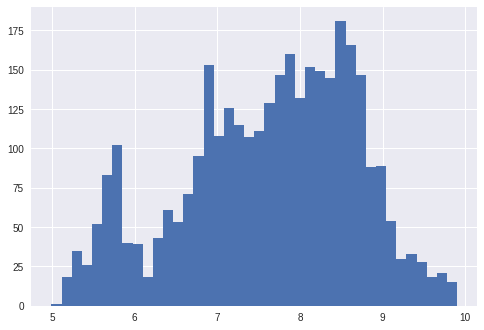

In [0]:
filt = merged_data_n['room_price']<=20000

merged_data_drop = merged_data_n[filt].reset_index(drop=True)  # reset indexes of merged_data_n

price = merged_data_drop['room_price']
price_log = np.log1p(price)

price_log.hist(bins=40)

plt.show()

In [0]:
selected_cols = ['room_capacity', 'hotel_user_Ratings', 'hotel_star', 'hotel_location_rating']
# selected_cols = all_cols_c

cols_X = [mc for mc in selected_cols if mc!='room_price']
# cols_X = [mc for mc in selected_cols]
cols_y = ['room_price']

X = merged_data_drop[cols_X]
y = merged_data_drop[cols_y]

In [0]:
y

,room_price
0,555
1,1167
2,1179
3,1179
4,1042
5,1042
6,1042
7,1042
8,1042
9,1042


In [0]:
special_chars = [' ','/','[',']','(',')']
special_chars_rm = ['!','-','–']

all_cols_rn = all_cols_c

for ch in special_chars:
  all_cols_rn = [c.replace(ch, '_') for c in all_cols_rn]
  
for ch in special_chars_rm:
  all_cols_rn = [c.replace(ch, '') for c in all_cols_rn]

rename_dict = {}
for i in range(len(all_cols_c)):
  rename_dict[all_cols_c[i]] = all_cols_rn[i]
  
X_rn = pd.DataFrame(X)
X_rn = X_rn.rename(columns=rename_dict)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_rn, y, test_size=0.1, random_state=42)

In [0]:
d = pd.concat([X_train, np.log1p(y_train)], axis=1)

model = smf.ols(formula = 'room_price ~  ' + ' + '.join(selected_cols) + ' + room_capacity*hotel_star',data = d).fit()  # + adult_capacity + benefit_free_breakfast
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             room_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     1535.
Date:                Mon, 08 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:43:19   Log-Likelihood:                -2523.6
No. Observations:                3006   AIC:                             5059.
Df Residuals:                    3000   BIC:                             5095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [0]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, np.expm1(y_pred))
rmse = np.sqrt(mean_squared_error(y_test, np.expm1(y_pred)))

print(r2, rmse)

0.6339177978830033 1903.3345207857653


In [0]:
pd.DataFrame.from_dict({'true':y_test['room_price'].values, 'pred':np.expm1(y_pred)})

,pred,true
479,4326.576477,3870
2078,794.933343,425
705,5307.656524,7073
1330,1420.450489,1243
1606,3572.794659,4057
817,7543.772158,5211
1255,1819.796099,2308
1422,2091.882832,3274
2120,775.642740,841
134,618.146350,1376


In [0]:
str_list = []

abc = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'


for a in range(n_comp):
  s = ''
  if(a<len(abc)):
    s = abc[a]
  else:
    while(a>=len(abc)):
      d = int(a/len(abc))
      r = a%len(abc)
      s += abc[d-1]
      a = d
    s += abc[r]
  str_list.append(s)

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.model_selection import KFold

In [0]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

In [0]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [0]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [0]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [0]:
!pip install mlxtend

In [0]:
from mlxtend.regressor import StackingCVRegressor

In [0]:
!pip install dask-ml

    100% |████████████████████████████████| 112kB 2.7MB/s 
    100% |████████████████████████████████| 716kB 24.5MB/s 
    100% |████████████████████████████████| 10.1MB 4.7MB/s 
fastai 1.0.51 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
  Found existing installation: dask 0.20.2
    Uninstalling dask-0.20.2:
      Successfully uninstalled dask-0.20.2
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0
